<a href="https://colab.research.google.com/github/etuckerman/CNN-Image-Classification-Architecture/blob/main/CNN_Image_Classification_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

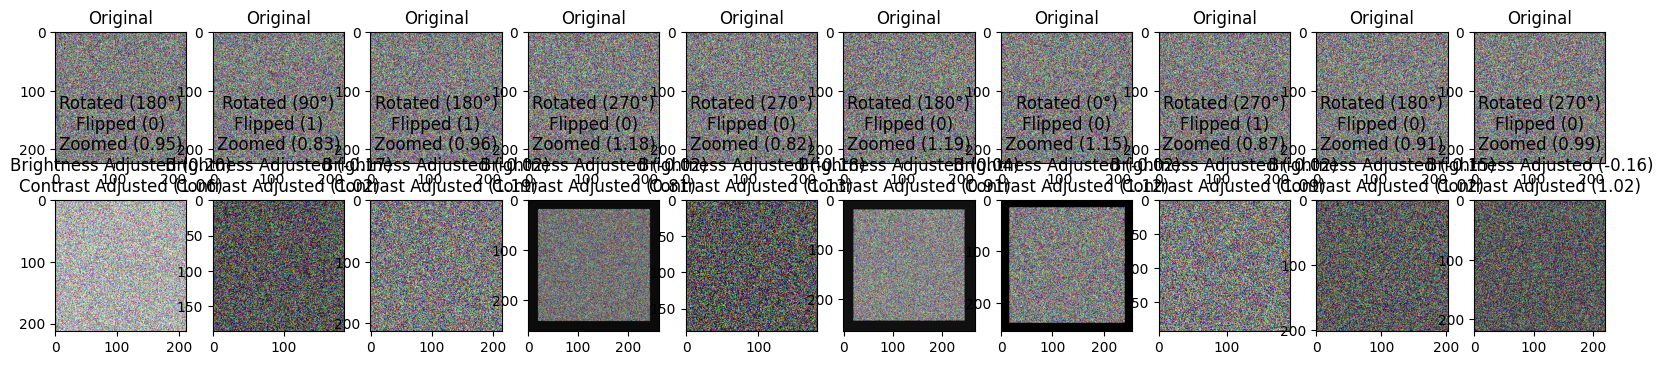

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define a function to generate a sample dataset
def generate_sample_dataset(num_images, image_size):
    """
    Generates a sample dataset with random images.

    Args:
    num_images (int): The number of images to generate.
    image_size (tuple): The size of the images (height, width, channels).

    Returns:
    tf.data.Dataset: A dataset containing the generated images.
    """
    # Generate random images
    images = np.random.rand(num_images, *image_size)

    # Create a dataset from the images
    dataset = tf.data.Dataset.from_tensor_slices(images)

    return dataset

# Define a function to apply random rotation
def random_rotation(image):
    """
    Applies random rotation to the input image.

    Args:
    image (tf.Tensor): The input image tensor.

    Returns:
    tf.Tensor: The rotated image tensor.
    """
    angle = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    return tf.image.rot90(image, angle), angle

# Define a function to apply random flipping
def random_flipping(image):
    """
    Applies random flipping to the input image.

    Args:
    image (tf.Tensor): The input image tensor.

    Returns:
    tf.Tensor: The flipped image tensor.
    """
    flip = tf.random.uniform(shape=[], minval=0, maxval=2, dtype=tf.int32)
    return tf.image.random_flip_left_right(image), flip

# Define a function to apply random zooming
def random_zooming(image):
    """
    Applies random zooming to the input image.

    Args:
    image (tf.Tensor): The input image tensor.

    Returns:
    tf.Tensor: The zoomed image tensor.
    """
    scale = tf.random.uniform(shape=[], minval=0.8, maxval=1.2, dtype=tf.float32)
    return tf.image.resize_with_crop_or_pad(image, int(image.shape[0] * scale), int(image.shape[1] * scale)), scale

# Define a function to apply random brightness
def random_brightness(image):
    """
    Applies random brightness to the input image.

    Args:
    image (tf.Tensor): The input image tensor.

    Returns:
    tf.Tensor: The image tensor with random brightness.
    """
    delta = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2, dtype=tf.float32)
    return tf.image.adjust_brightness(image, delta), delta

# Define a function to apply random contrast
def random_contrast(image):
    """
    Applies random contrast to the input image.

    Args:
    image (tf.Tensor): The input image tensor.

    Returns:
    tf.Tensor: The image tensor with random contrast.
    """
    contrast_factor = tf.random.uniform(shape=[], minval=0.8, maxval=1.2, dtype=tf.float32)
    return tf.image.adjust_contrast(image, contrast_factor), contrast_factor

# Define a function to apply multiple augmentations
def apply_augmentations(image):
    image, angle = random_rotation(image)
    image, flip = random_flipping(image)
    image, scale = random_zooming(image)
    image, delta = random_brightness(image)
    image, contrast_factor = random_contrast(image)
    return image, angle, flip, scale, delta, contrast_factor

# Generate a sample dataset
num_images = 10
image_size = (224, 224, 3)
dataset = generate_sample_dataset(num_images, image_size)

# Apply augmentations to the dataset
augmented_dataset = dataset.map(apply_augmentations)

# Display the original and augmented images
fig, axs = plt.subplots(2, num_images, figsize=(20, 4))
for i, (original_image, (augmented_image, angle, flip, scale, delta, contrast_factor)) in enumerate(zip(dataset, augmented_dataset)):
    axs[0, i].imshow(original_image)
    axs[0, i].set_title('Original')
    axs[1, i].imshow(tf.clip_by_value(augmented_image, 0, 1))  # Clip values to avoid data clipping warnings
    axs[1, i].set_title(f'Rotated ({angle * 90}°)\nFlipped ({flip})\nZoomed ({scale:.2f})\nBrightness Adjusted ({delta:.2f})\nContrast Adjusted ({contrast_factor:.2f})')
plt.show()